# I&R with multiphase analysis
Let's say that you would like to know the largest transiting planet that you could be able to detect
by using `transitleastsquares`. This is a typical use case where most of the scientists are injecting
a transit model (given a a planetary radius, orbital period, epoch and duration) into a light curve
and perform a simple search with `transitleastsquares`. Even though this is a fair approach, it might
return inconsistent results due to some reasons, where the main one is the bias introduced by the
chosen epoch. The light curves usually show non-uniform noise with time and that makes some transits to
be recoverable when they happen at certain epochs and unrecoverable at some other epochs.

Here comes TIRMA, which provides a more robust recovery technique: in addition to creating a grid of
periods and radiuses, se

In [2]:
import os
import multiprocessing
from sherlockpipe.sherlock import Sherlock
from sherlockpipe.objectinfo.MissionObjectInfo import MissionObjectInfo

toi178_object_info = MissionObjectInfo("TIC 251848941", [2])
sherlock = Sherlock(False, [toi178_object_info], False) \
        .setup_detrend(n_detrends=4) \
        .setup_transit_adjust_params(period_min=0.45, period_max=22, run_cores=multiprocessing.cpu_count() - 1,
                                     best_signal_algorithm="quorum", min_quorum=0.5)

We choose the next parameters:
* The `MissionObjectInfo` is initialized with the TIC of the TOI-178 and we will only
search data from the sector nº 2.
* A number of detrends to be used of 4. This is generally a low value
and for real executions we will use even more than 10 detrends, but it will serve for the
example.
* A search grid between the period range of 0.45 and 22 (we only count with one sector).
* Use all the cpu cores but one.
* Finally, we choose to use the `quorum` algorithm, which in addition to the `min_quorum`
value set to 0.5 will stop the execution as soon as the found `Sherlock` signals in
the last run do not agree with more than the half of the votes.

Let's run it and see what happens.

In [21]:
sherlock.run()

SHERLOCK (Searching for Hints of Exoplanets fRom Lightcurves Of spaCe-base seeKers)
Version 14
MODE: ANALYSE
ID: TIC251848941_[2]
Retrieving star catalog info...
Found cached file /home/martin/.lightkurve-cache/mastDownload/TESS/tess2018234235059-s0002-0000000251848941-0121-s/tess2018234235059-s0002-0000000251848941-0121-s_lc.fits with expected size 2004480.
7% (1420/19737) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
STELLAR PROPERTIES FOR THE SIGNAL SEARCH
Star catalog info downloaded.
limb-darkening estimates using quadratic LD (a,b)= (0.4834, 0.1895)
mass = 0.680000
mass_min = 0.599601
mass_max = 0.760399
radius = 0.660806
radius_min = 0.601185
radius_max = 0.720427
teff = 4339.000000
lum = 0.139444
logg = 4.630430
USER DEFINITIONS
Detrend method: Bi-Weight
No of detrend models applied: 4
Minimum number of transits: 2
Period planet protected: 10.0
Minimum Period (d): 0.5
Maximum Period (d): 22.0
Binning size (min): 10.0
Mask: no
Threshold limit for

7% (1420/19737) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


Ok it seems that Sherlock already finished. From the output we can read that `Sherlock`
executed 7 runs. That means the it found 6 runs with a good quorum (the last one was not
very promising and therefore the execution finished. Knowing that, we will inspect the
best results from each run.

We will start from the beginning, of course. We will inspect the results of the first run:

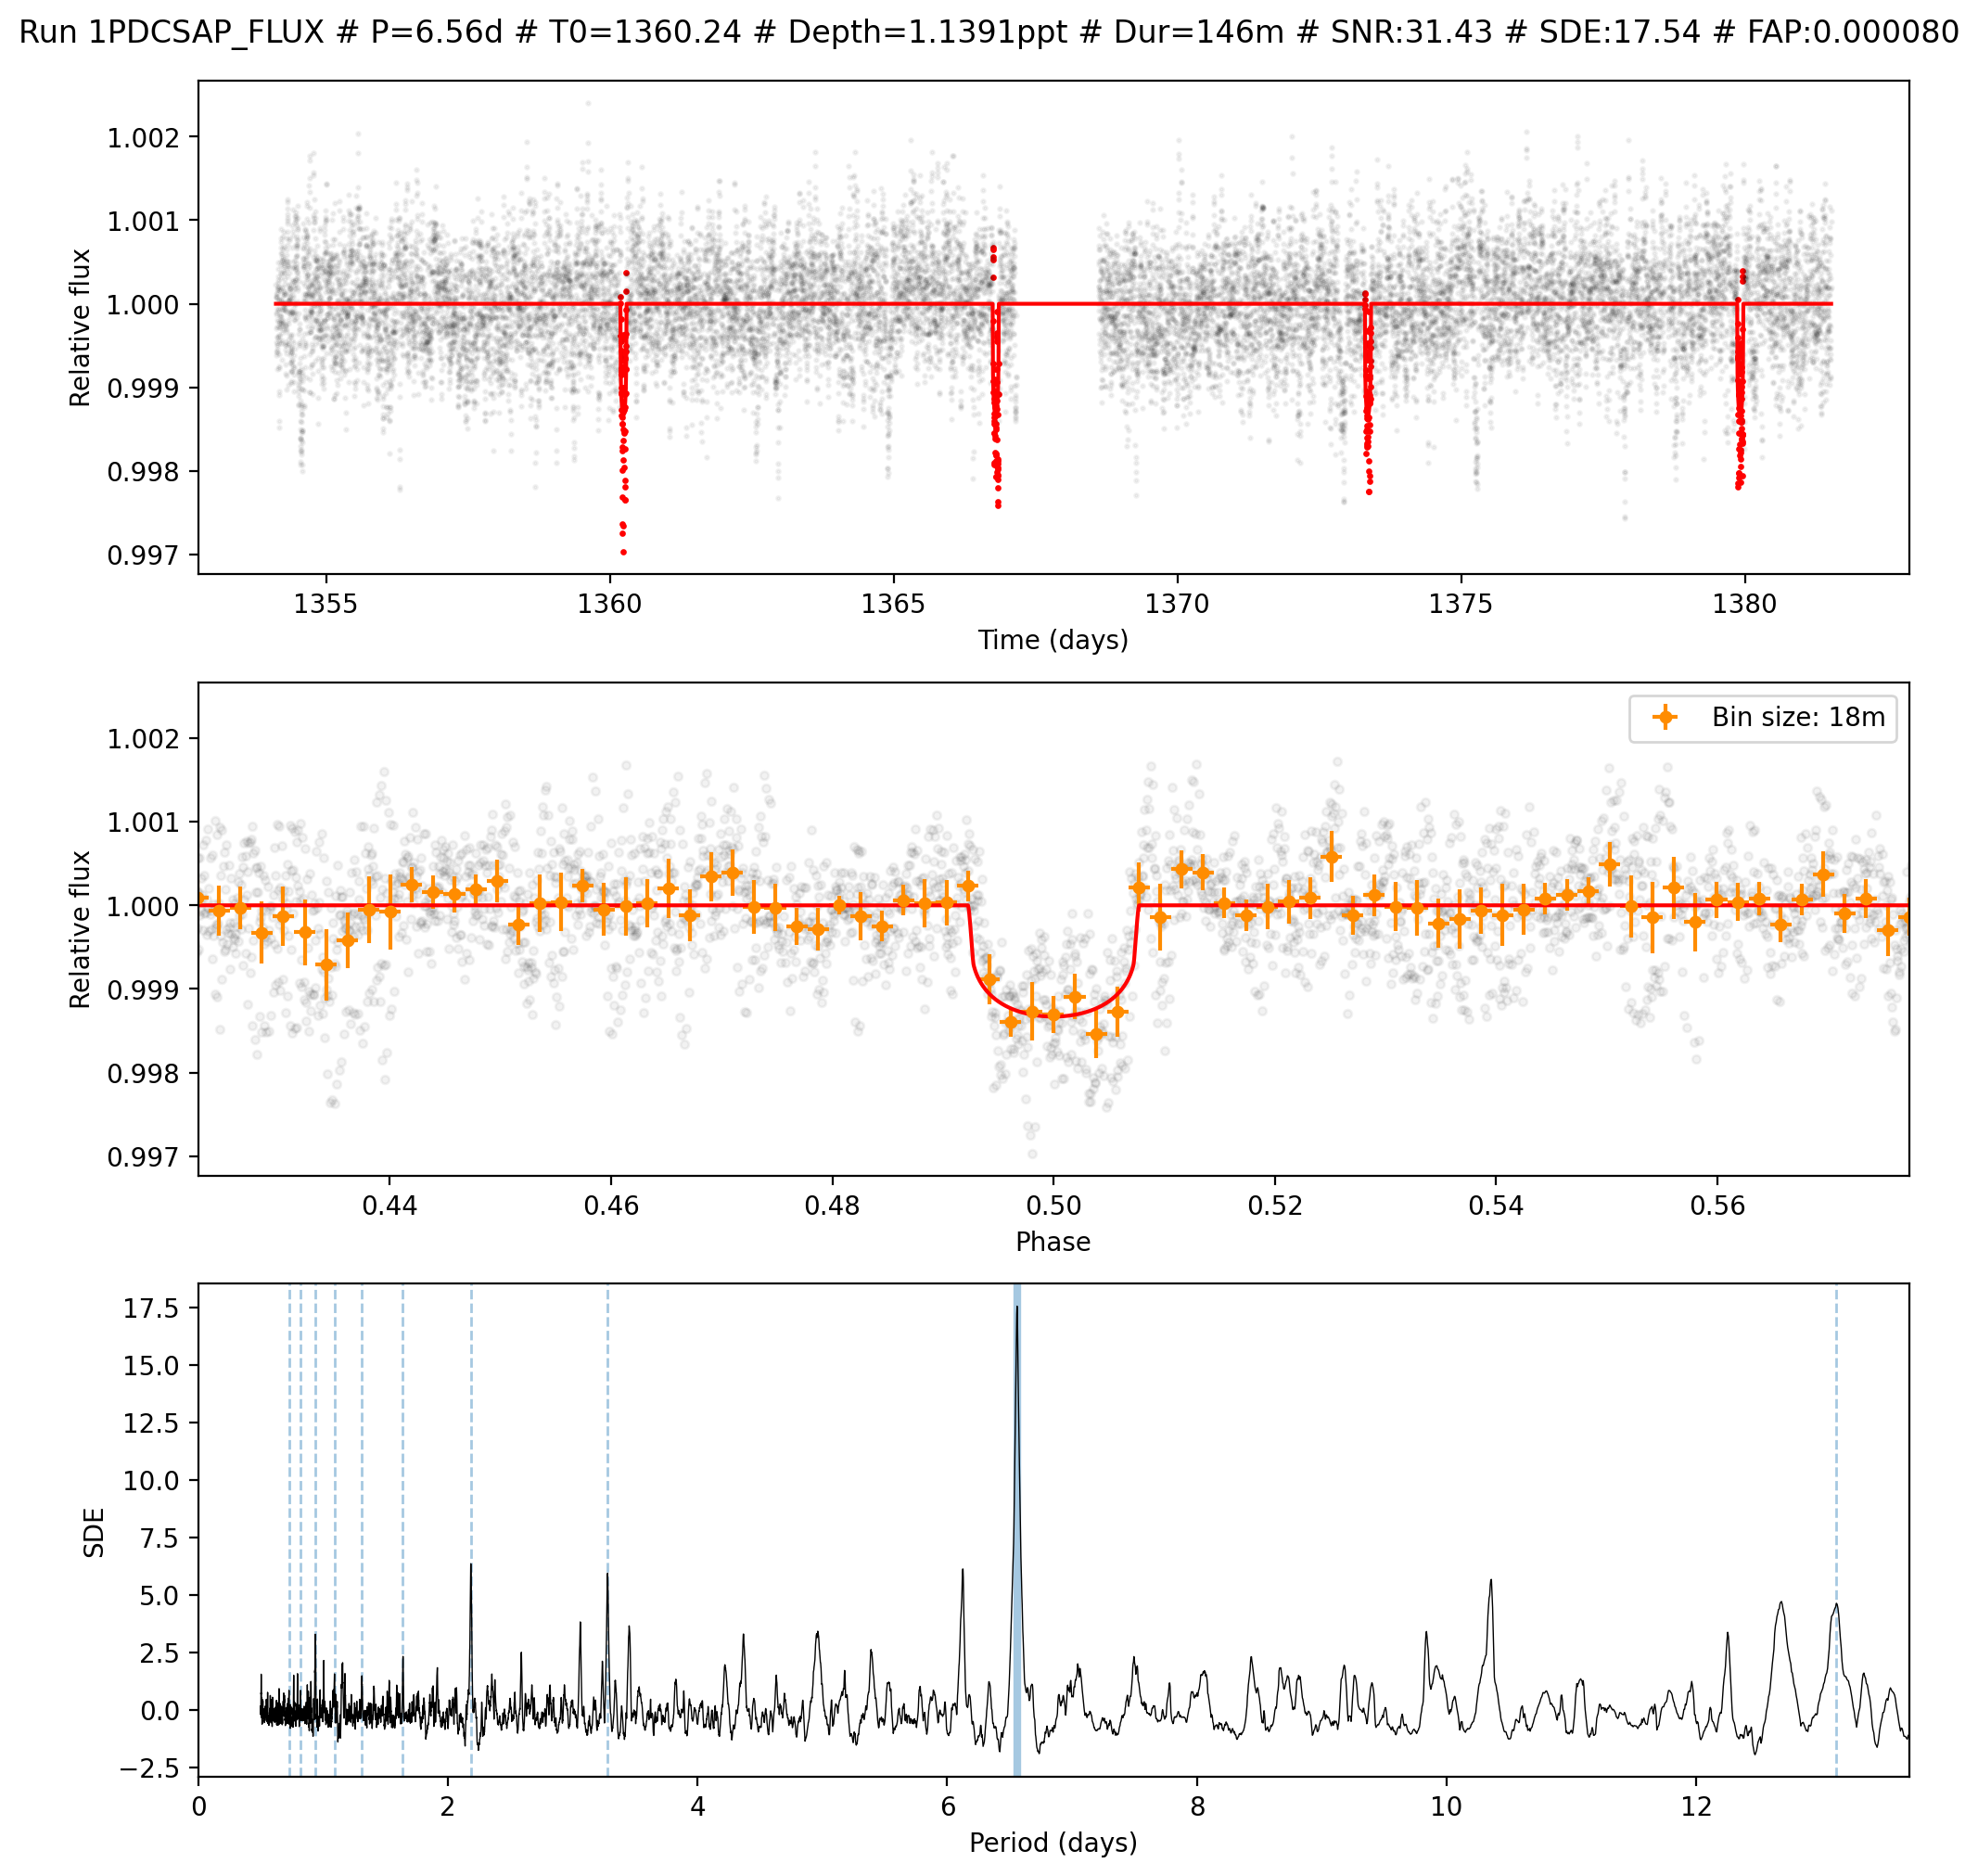

In [15]:
your_execution_dir = os.getcwd()
file_image = your_execution_dir + '/TIC251848941_[2]/1/Run_1_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

Well, we can be sure that we have already retrieved the TOI-178.01 with P=6.56d in the
first run. We could then inspect the second one:

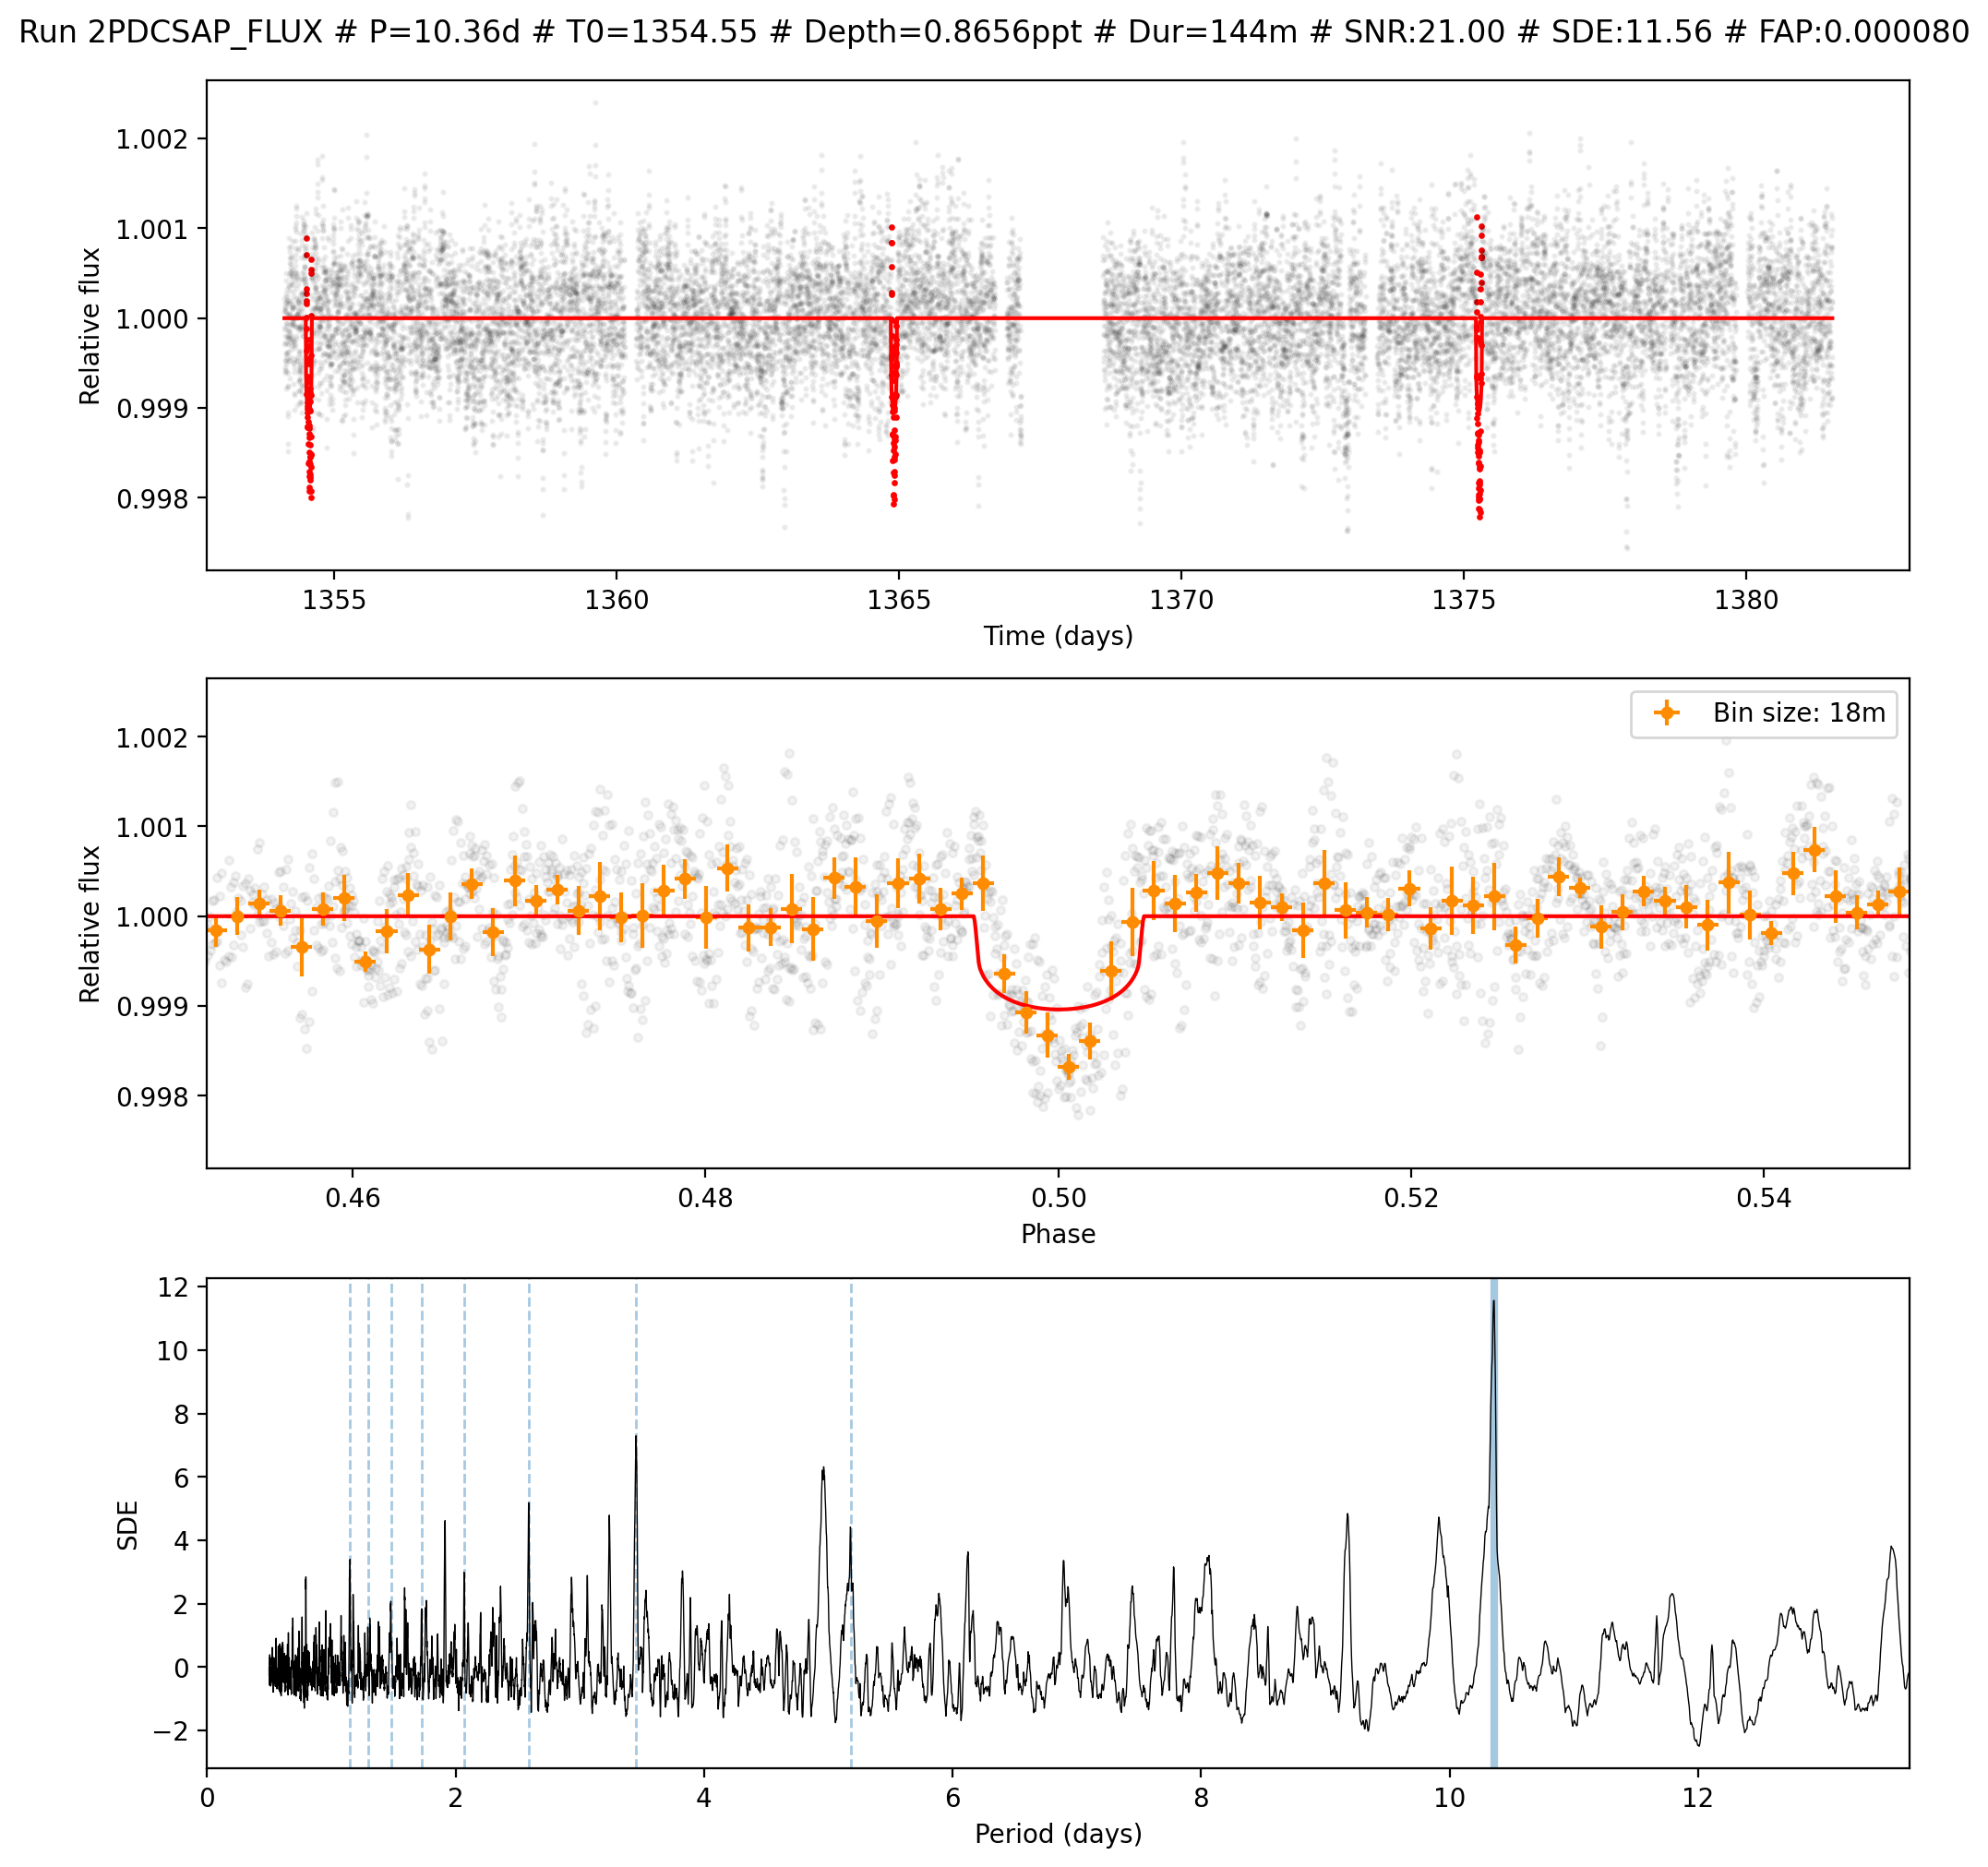

In [16]:
file_image = your_execution_dir + '/TIC251848941_[2]/2/Run_2_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

We found the TOI-178.02! If we look into Leleu et al. (2021) we will see that the found
period of P=10.35d matches with the P=20.7d planet found there. This seems to be happening
because we are inspecting only one sector and as a consequence we cannot find periods greater
than 13 days approximately.

Ok, assuming we are doing it fine, we can continue our search for the next candidate:

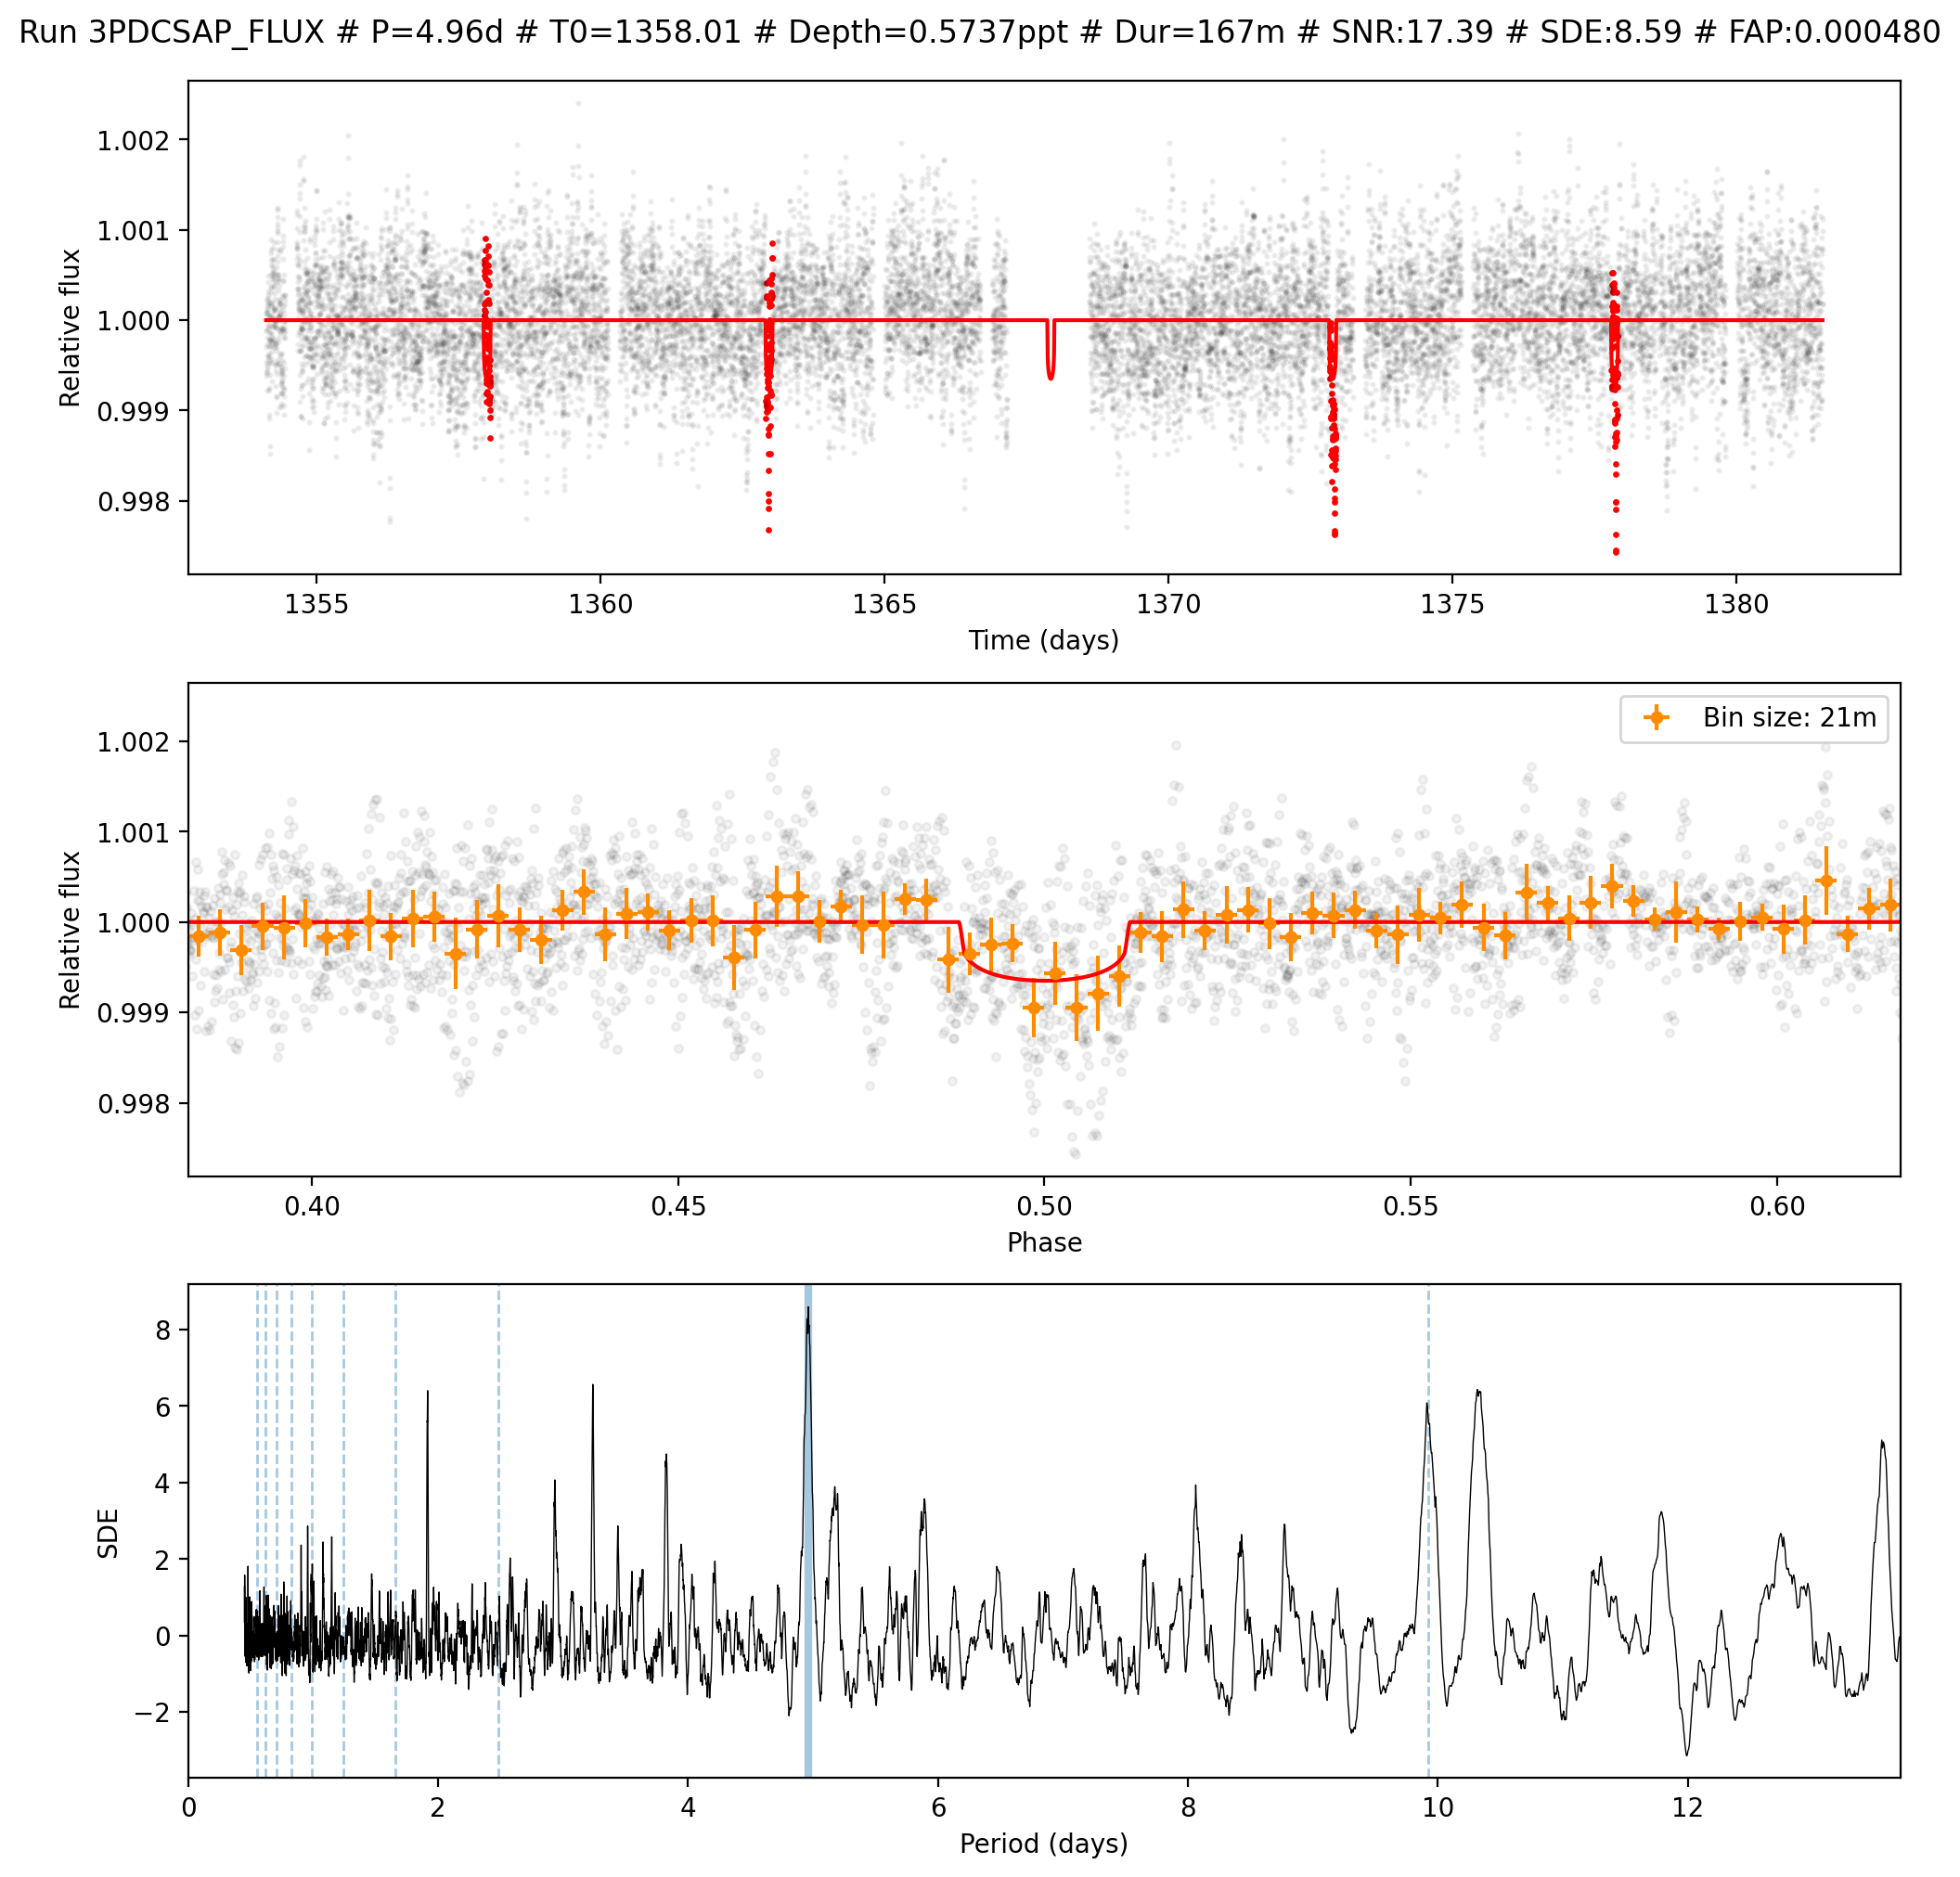

In [22]:
file_image = your_execution_dir + '/TIC251848941_[2]/3/Run_3_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

We are finding a candidate with a P=4.96d. That matches with the TOI-178.03 with P=9.95. It
is not clear we we would be finding the first subharmonic first than the real transit, but
we can see that the real period was also very strong in the power spectrum. We have detected
the three candidates from the official TESS pipeline SPOC. But wait! Do you remember that
`Sherlock` returned up to 6 promising runs? Let's have a look at them:

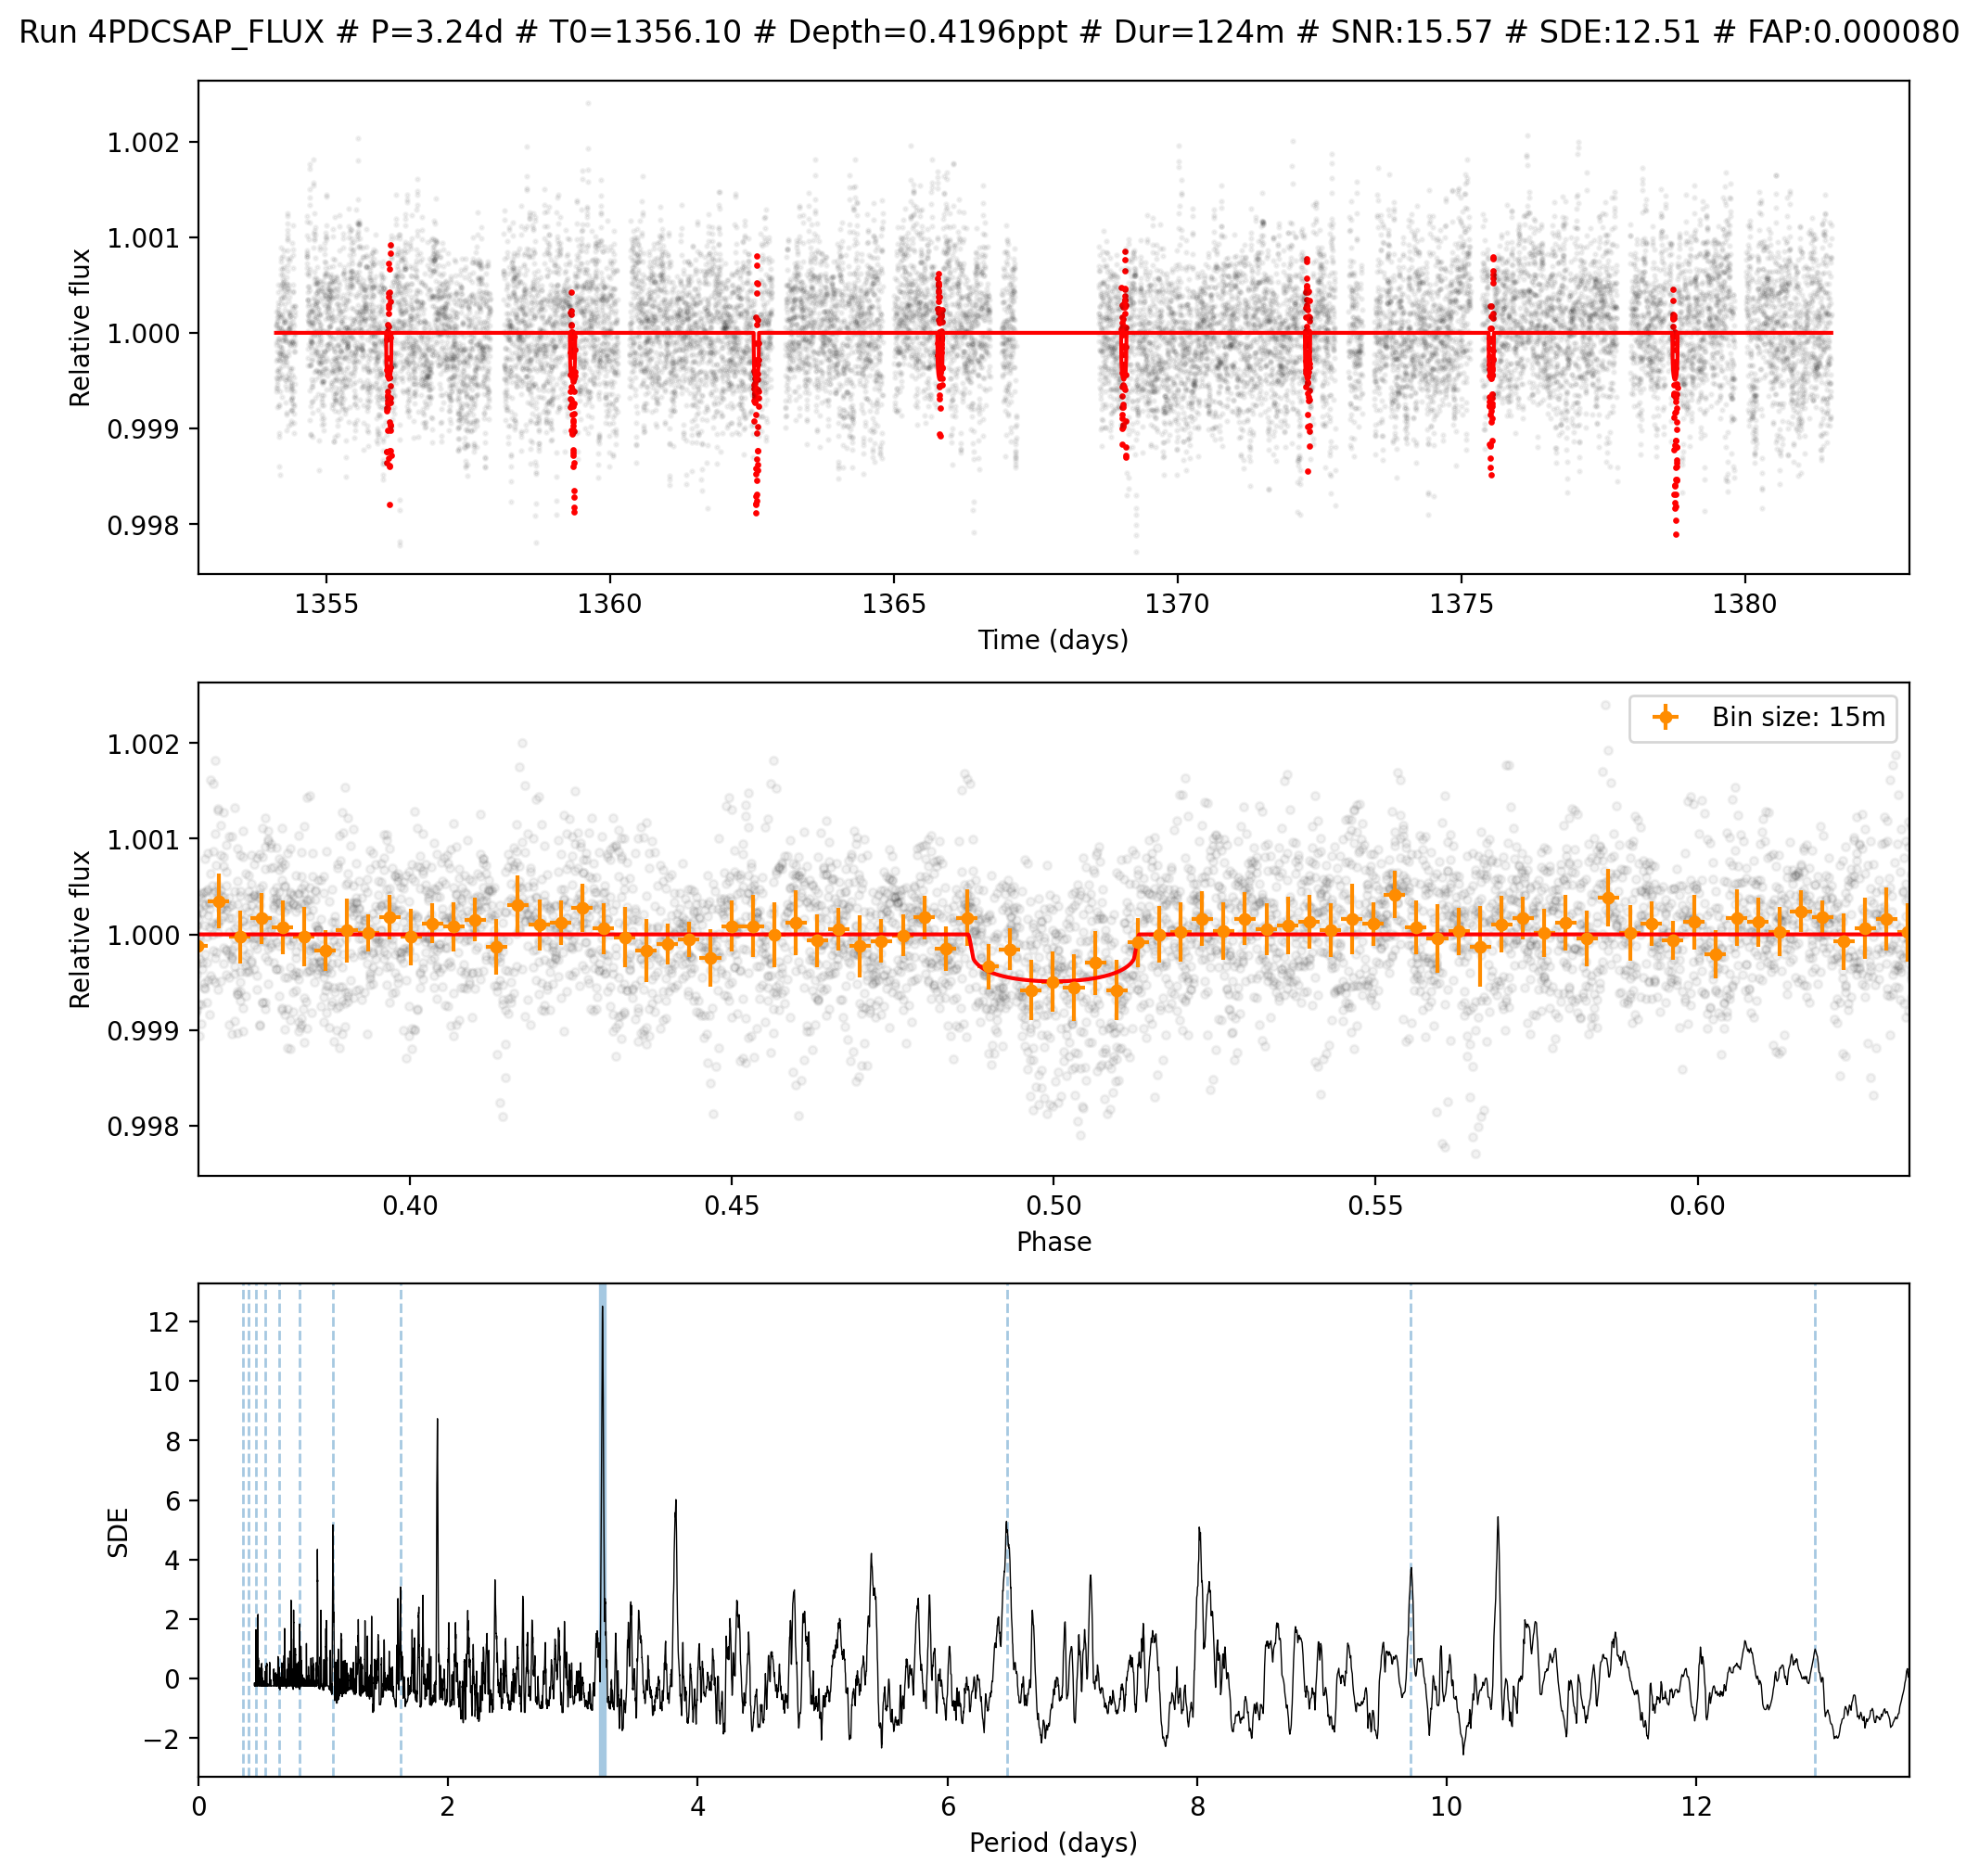

In [23]:
file_image = your_execution_dir + '/TIC251848941_[2]/4/Run_4_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)


This is a candidate with P=3.24d. Wow! It seems that we are finding one of the new confirmed
planets from Leleu et al. (2021) that wasn't alerted by the SPOC! And we did it only from the
TESS data (no CHEOPS nor RVs data). And look at the SNR, it is still very high!

Well, we have two promising runs to analyze yet. Let's see the 5th run:

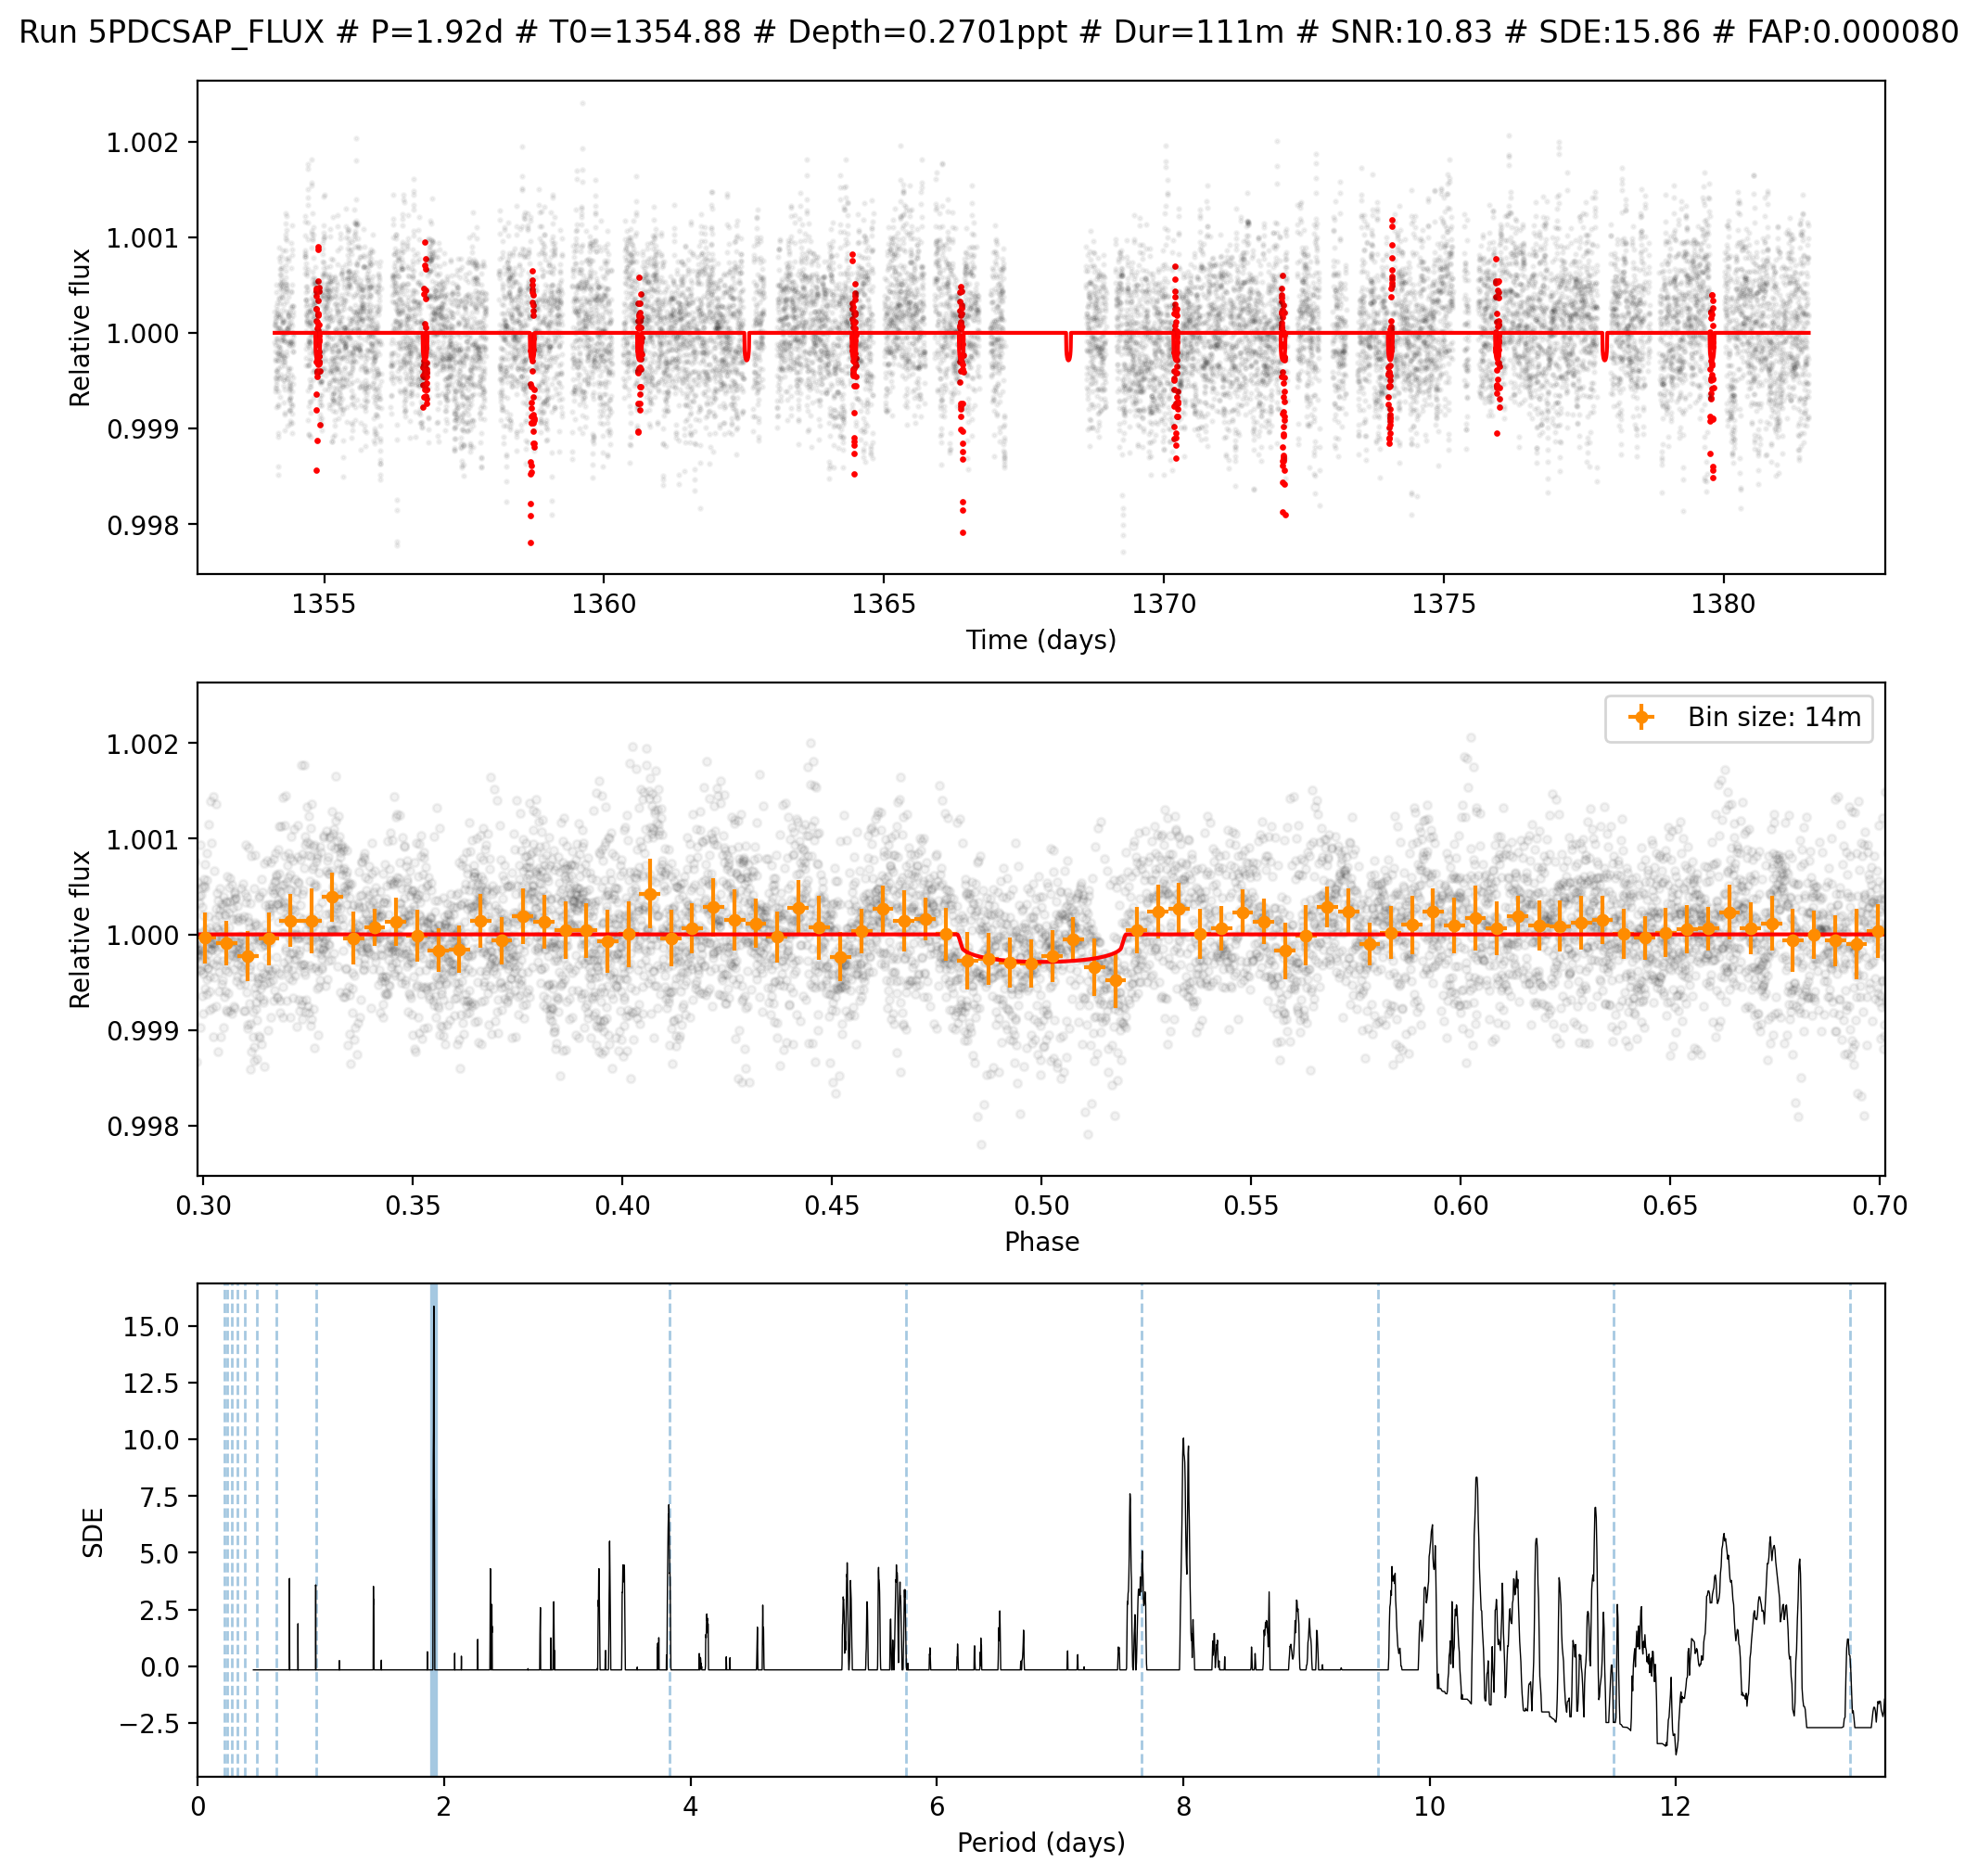

In [24]:
file_image = your_execution_dir + '/TIC251848941_[2]/5/Run_5_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

There is now a candidate with P=1.92d. That one matches another new confirmed planet from
the authors that wasn't either alerted by the SPOC! And again only from the TESS data.

There is only one promising run to be analyzed already, but we don't expect finding more
confirmed planets as the one with 15.5 days lies out of the period grid finally used by
`Sherlock`:

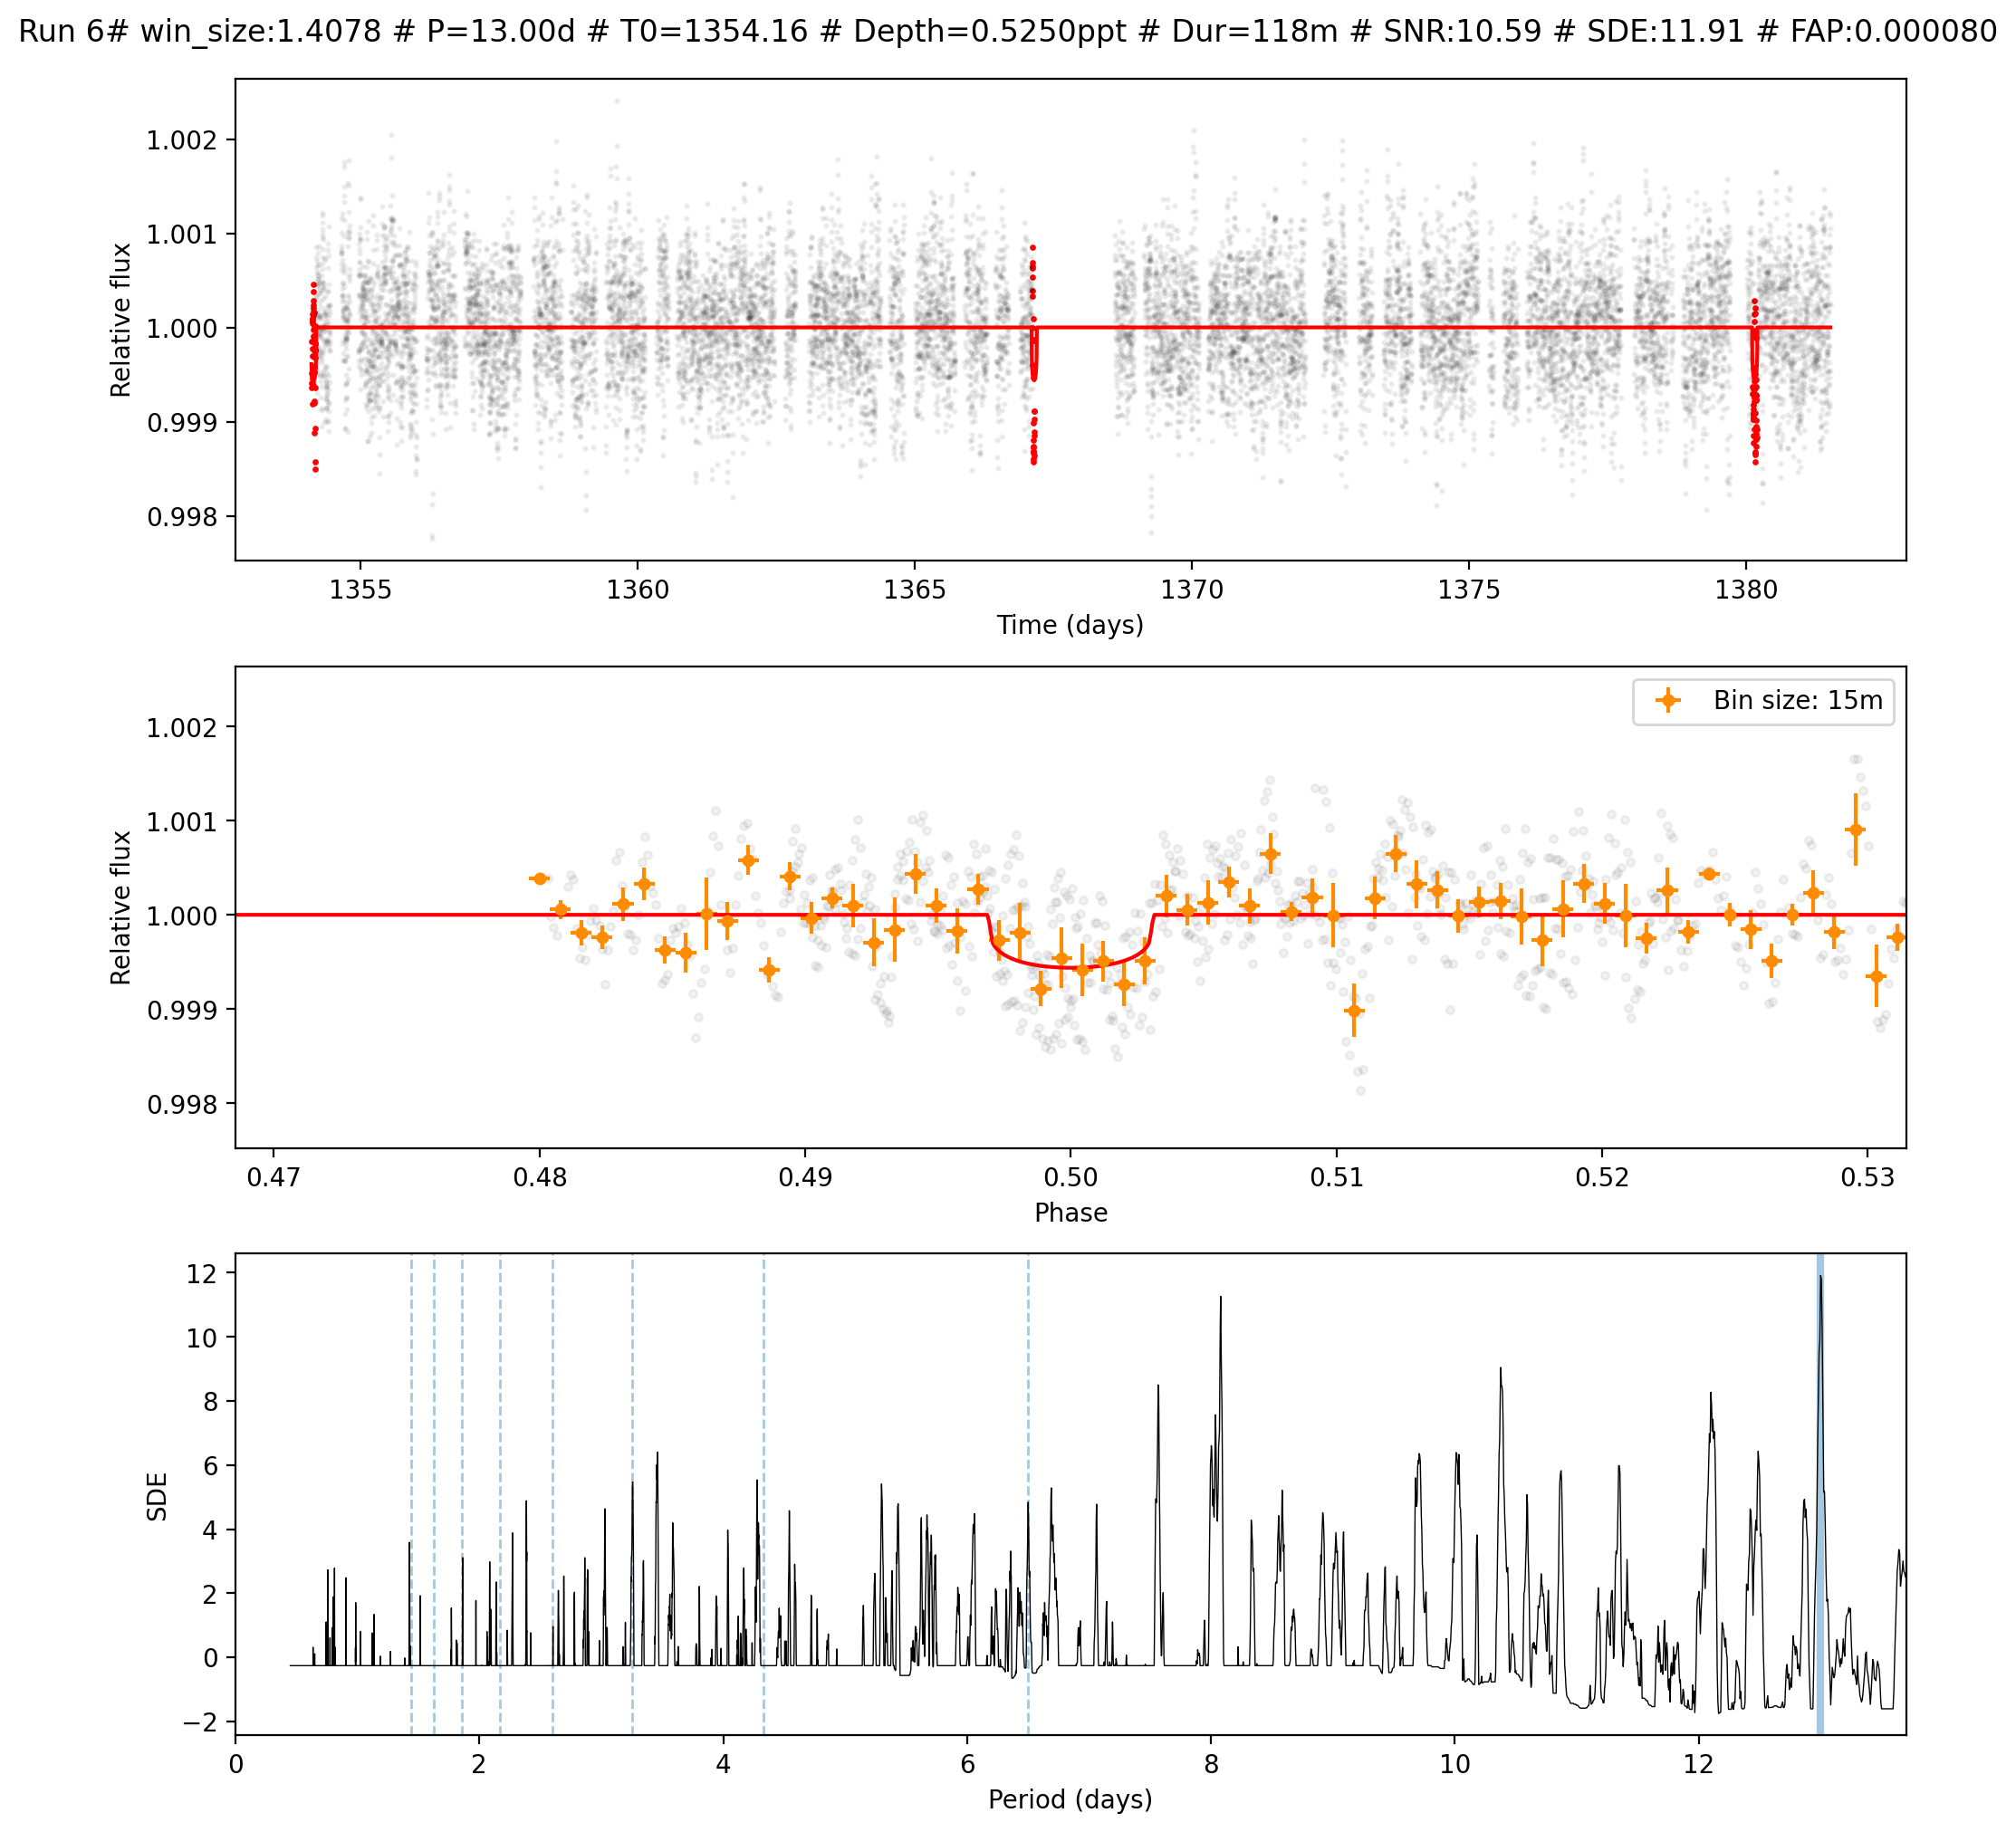

In [26]:
file_image = your_execution_dir + '/TIC251848941_[2]/6/Run_6_ws=1.4078_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

It seems that this candidate is not very reliable (it lies on the borders of the data).
The candidates TOI-178.02 and TOI-178.03 are too close. Maybe any of them is a subharmonic
of the real period. We could perform a search now to see whether we find it properly, by setting
a minimum period of 11 and masking the reliable candidates that we found previously:

In [2]:
toi178_object_info.initial_transit_mask = [{"P": 6.5591, "T0": 1360.24, "D": 146.10},
                                            {"P": 4.9628, "T0": 1358.01, "D": 167.02},
                                            {"P": 3.2375, "T0": 1356.10, "D": 123.87},
                                            {"P": 1.9159, "T0": 1354.88, "D": 111.07}]
sherlock = Sherlock(False, [toi178_object_info], False) \
        .setup_detrend(n_detrends=4) \
        .setup_transit_adjust_params(period_min=11, period_max=22,
                                     run_cores=multiprocessing.cpu_count() - 1, best_signal_algorithm="quorum",
                                     min_quorum=0.5)

Let's run SHERLOCK again with these parameters!

In [ ]:
sherlock.run()

Ok, it already finished. We can see in the report that 3 candidates were found. Let's go to the
inspection!

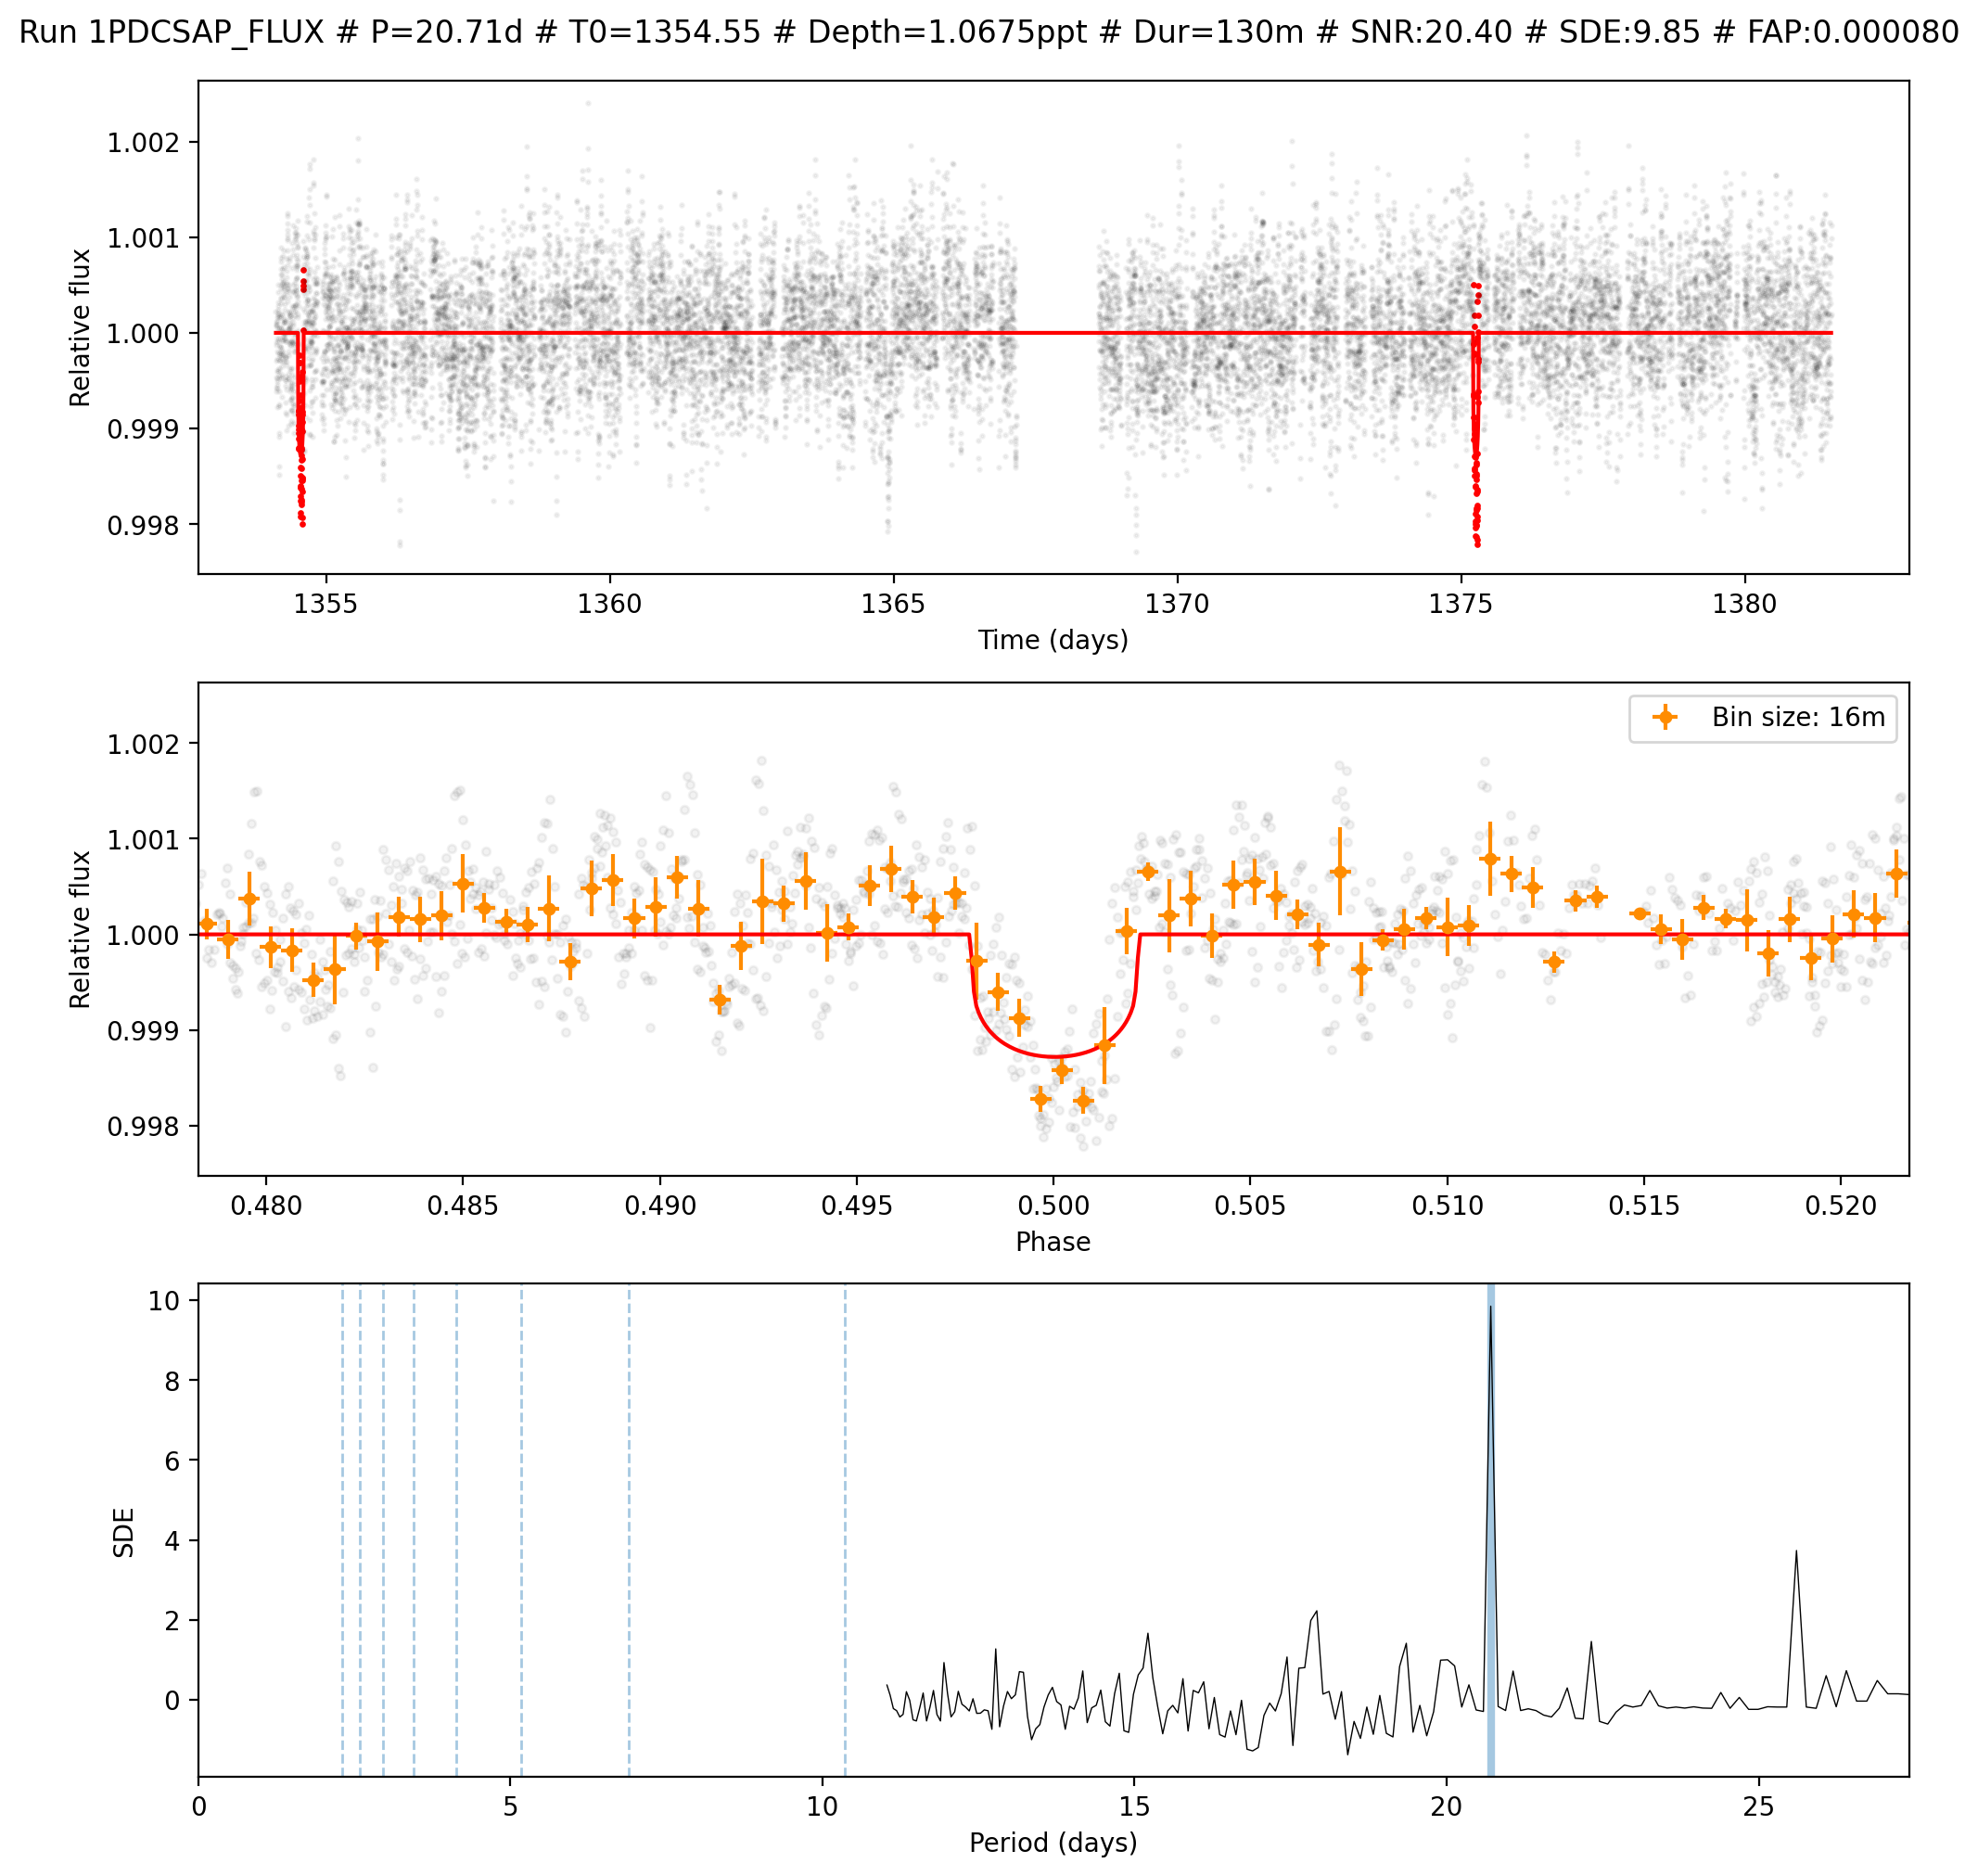

In [5]:
your_execution_dir = os.getcwd()
file_image = your_execution_dir + '/TIC251848941_[2]/1/Run_1_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

It seems that we have now found the planet at P=20.7d. Looking finally at the last promising candidate:

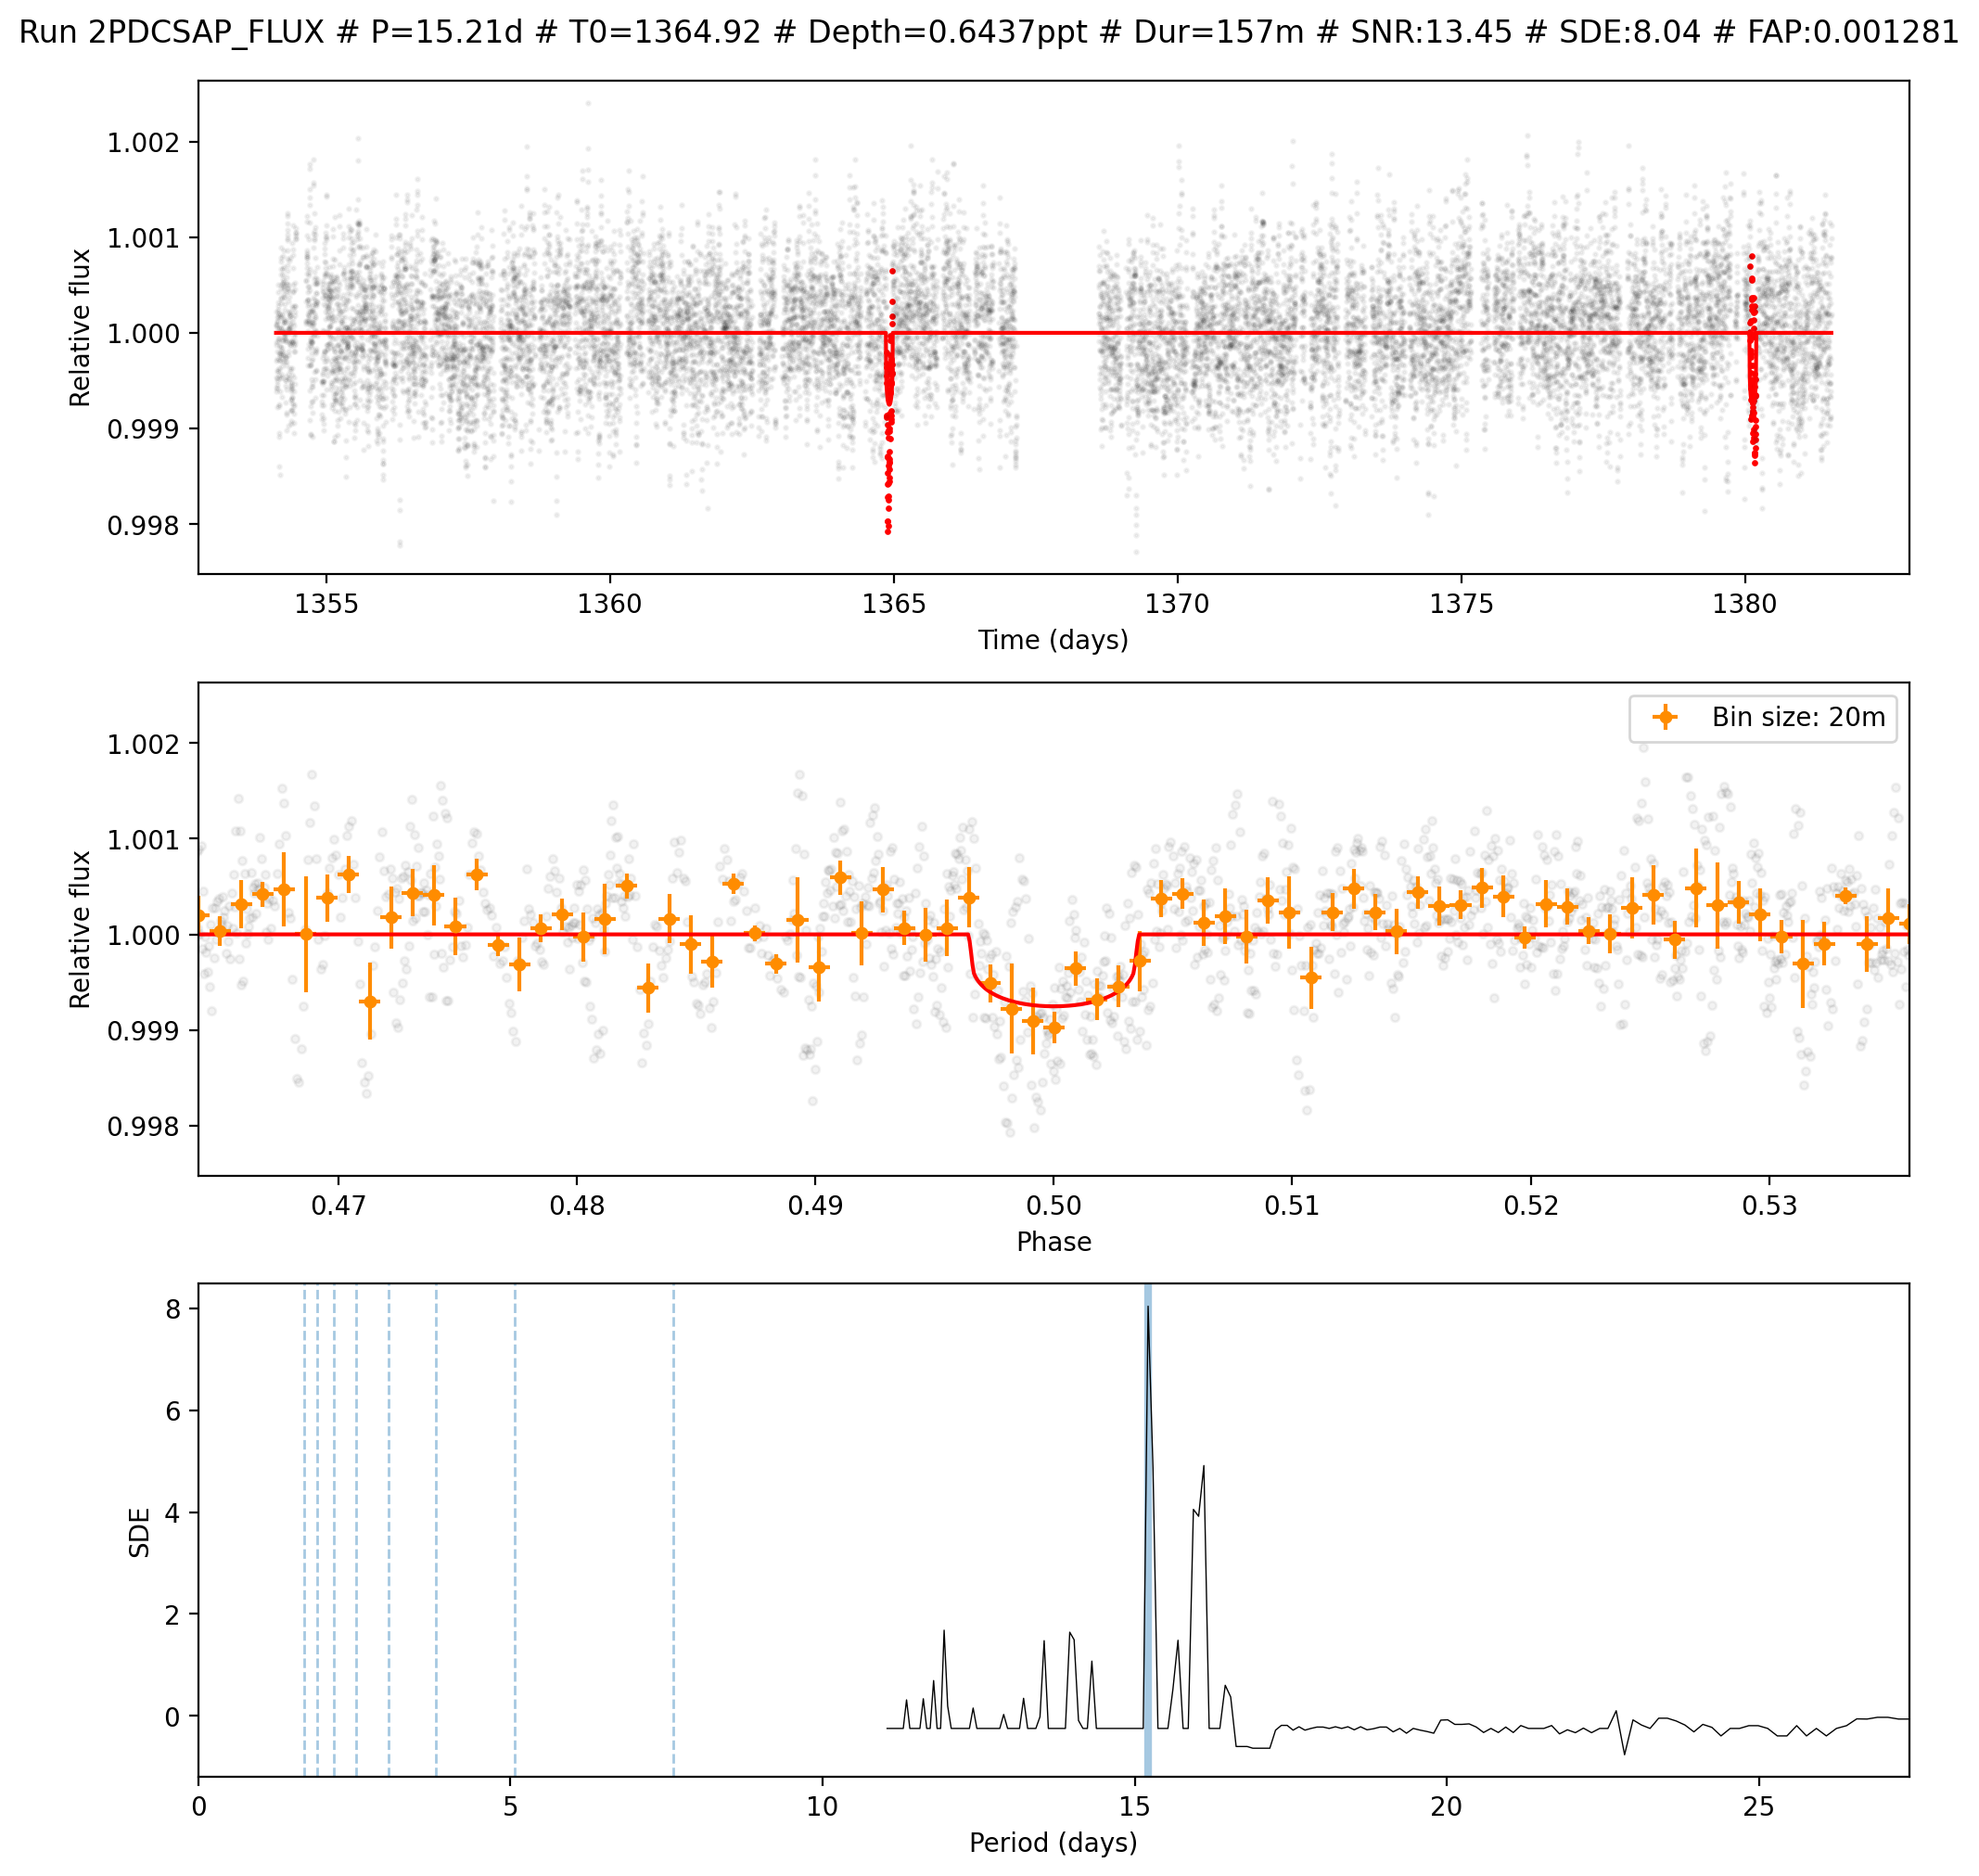

In [7]:
file_image = your_execution_dir + '/TIC251848941_[2]/2/Run_2_PDCSAP-FLUX_TIC251848941_[2].png'
from IPython.display import Image
Image(filename=file_image)

And finally found the last one at P=15.21d! Good for SHERLOCK again!

We conclude our analysis here: `SHERLOCK` has been able to spot candidates which were
only identified after precise follow-up observations so far. We can also observe how
the SNRs of the signals found by `SHERLOCK` are way higher than the ones obtained by the
official SPOC pipeline. These are great indicators of the `SHERLOCK` capabilities!